# Final Project Stochastic 

**This project include:**

1) implemntation code from scratch using python

2) Latex Documentation of the algorithm

**Data:**

1) ECG distorted signal **dist_signal** - used to implement the project - 

2) original ECG signal **original_signal** - used to validate our result - 

### Distorting signal loading

In [228]:
import pandas as pd

#load distorted signal as a data frame
dist_signal = pd.read_csv('distorted_ECG.txt' , header = None)
#rename the header with 'signal'
dist_signal.rename(columns={0:'distSignal'}, inplace=True)
#show our table 
dist_signal

,distSignal
0,0.204571
1,0.096060
2,-0.250570
3,-0.454069
4,-0.503238
...,...
355,0.196010
356,0.326444
357,0.035318
358,0.035252


### Original signal loading 

In [229]:
#load original signal as a data frame
original_signal = pd.read_csv('Original_ECG.txt' , header = None)
#rename the header with 'signal'
original_signal.rename(columns={0:'originalSignal'}, inplace=True)
#show our table 
original_signal

,originalSignal
0,0.026670
1,0.058521
2,0.111100
3,0.188177
4,0.289170
...,...
355,-0.000134
356,-0.000369
357,-0.000013
358,0.002440


### Data comparison and visualization

[Text(0, 0.5, 'Amplitude'), Text(0.5, 0, 'Samples')]

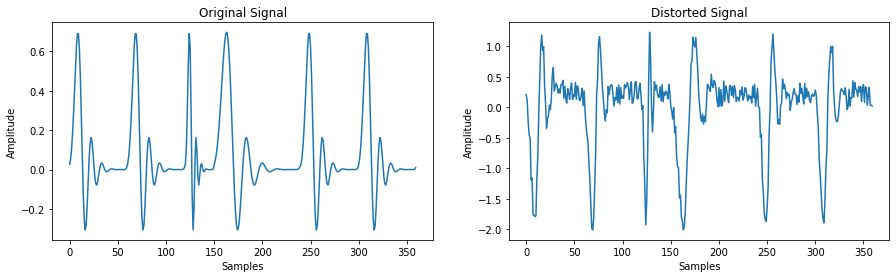

In [230]:
fig, axs = plt.subplots(1,2 ,figsize=(15,4))
# original signal visualization 
axs[0].plot(original_signal)
axs[0].set_title('Original Signal')
axs[0].set(xlabel='Samples', ylabel='Amplitude')

# distorrted signal visualization 
axs[1].plot(dist_signal)
axs[1].set_title('Distorted Signal')
axs[1].set(xlabel='Samples', ylabel='Amplitude')

### using scipy from signal library

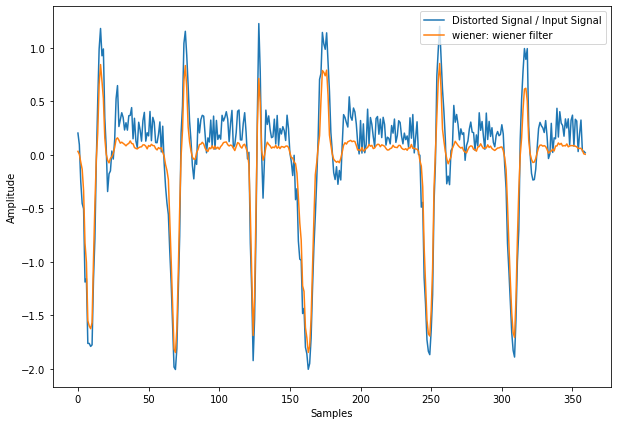

In [231]:
from scipy import signal
from matplotlib import pyplot as plt

plt.figure (figsize = (10,7))

plt.plot(dist_signal, label='Distorted Signal / Input Signal')

# noise The noise-power to use. If None, then noise is estimated as the average of the local variance of the input.
plt.plot(signal.wiener(dist_signal , noise = None ), label='wiener: wiener filter')
plt.xlabel('Samples')
plt.ylabel('Amplitude')

plt.legend(loc=1)
plt.show()

## Applying the wiener filter on the signal and the output ( # Requirement no.2 )

### Mean Squae Error calculations

**Mean Square Error** $$ (MSE) = E(e(n)^2) = E ( (x(n) - \hat{x}(n))^2 )  =  E ( (x(n) - \sum_{i=0}^{I} h(i) * y(n-i) )^2 ) $$ 

In [232]:
# create X_hat from wiener signal 
X_hat = pd.DataFrame( signal.wiener(dist_signal))

# create X from the original signal 
X = pd.read_csv('Original_ECG.txt' , header = None)

In [233]:
# subtract x from x_hat to get the error 
error = X.subtract(X_hat , axis = 0)

#square the error 
error_sqr = error**2

#get the mean of the error to obtain the MSE 
MSE = error_sqr.mean()
MSE

0    0.526436
dtype: float64

## Calculating the MSE ( # Requirement no.3 )

In [234]:
error.mean()

0    0.149424
dtype: float64

# Note:

i dont know if this mean square error is huge or not but it make sense to me some how, because the amplitude of the orginal signal compared to the distorted signal is far away as shown below

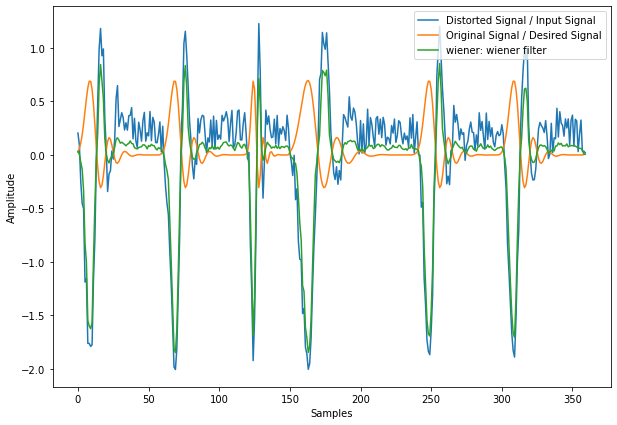

In [235]:
plt.figure (figsize = (10,7))

plt.plot(dist_signal, label='Distorted Signal / Input Signal')
plt.plot(original_signal, label='Original Signal / Desired Signal')

# noise The noise-power to use. If None, then noise is estimated as the average of the local variance of the input.
plt.plot(signal.wiener(dist_signal , noise = None ), label='wiener: wiener filter')
plt.xlabel('Samples')
plt.ylabel('Amplitude')

plt.legend(loc=1)
plt.show()